## Testing moss photosynthesis parameterization

## Note 1 Found a bug in 'tresp' parameters for mosses; see below
    # tresp': {
    #        'Vcmax': [78., 200., 649.], # WAS EARLIER like this; the last parameter was Topt in degC, not Sd in J mol-1 as it supposed to be!
    #                 [69.83, 200.0, 27.56]
            'Jmax': [56., 200., 646.], #[100.28, 147.92, 19.8],
            'Rd': [33.0]

## Note 2! Found a bug in bryophoto.photo_temperature_response()

Now corrected!

## Note 2! Commented out rows 116--- in OrganicLayer

      # SAMULI OUTCOMMENTED 29/11 FOR TESTING
        # scaling Farquhar params from [umol g-1 s-1] to [umol m-2 s-1]
        #properties['photosynthesis']['Vcmax'] *= self.dry_mass * 1000 # kg in g
        #properties['photosynthesis']['Jmax'] *= self.dry_mass * 1000 # kg in g
        #properties['photosynthesis']['Rd'] *= self.dry_mass * 1000 # kg in g

Samuli 29.11.2022


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from canopy.forestfloor.organiclayer import OrganicLayer # organic layer class
import canopy.forestfloor.bryophoto as photo # photo-module


In [23]:
# create Sphagnum using our 'default' parameters from parameters.Degero

Sphagnum = {
    'name': 'Sphagnum sp.',
    'layer_type': 'bryophyte',
    'coverage': 1.0,
    'height': 0.06, # [0.044, 0.076]
    'roughness_height': 0.02,
    'bulk_density': 35.1,  # [9.28, 46.7]
    'max_water_content': 17.8,  # [15.6, 24.4]
    'water_content_ratio': 0.43,  # max_symplast_water_content:max_water_content -ratio
    'min_water_content': 0.1,
    'porosity': 0.98,

    'photosynthesis': { # farquhar-parameters
        'Vcmax': 45.0, 'Jmax': 85.5, 'Rd': 1.35, # umolm-2s-1
        'alpha': 0.3, 'theta': 0.8, 'beta': 0.9, # quantum yield, curvature, co-limitation
        'gmax': 0.04, 'wopt': 7.0, 'a0': 0.7, 'a1': -0.263, 'CAP_desic': [0.58, 10.0],
        'tresp': {
            'Vcmax': [78., 200., 649.], # WAS EARLIER like this; the last parameter is Topt, not Sd[69.83, 200.0, 27.56]
            'Jmax': [56., 200., 646.], #[100.28, 147.92, 19.8],
            'Rd': [33.0]
        }
    },
    'optical_properties': { # moisture responses are hard-coded
        'emissivity': 0.98,
        'albedo': {'PAR': 0.10, 'NIR': 0.27} # albedos when fully hydrated [-]
    },
    'water_retention': {
        'alpha': 0.381,  # based on fitted value
        'n': 1.781,  # based on fitted value
        'saturated_conductivity': 3.4e-4,  # [m s-1], based on fitted value
        'pore_connectivity': -2.11  # based on fitted value
    },
    'initial_conditions': {
        'temperature': 10.0,
        'water_content': 20.0
    }
}

# Claas' Meerkolk -version

# this is general Sphagnum parametrisation based on literature review
Sphagnum_Meerkolk = {
    'name': 'Sphagnum sp.',
    'layer_type': 'bryophyte',
    'coverage': 1.0,
    'height': 0.0356, # [0.044, 0.076] 0.0356
    'dry_mass':0.266, # kg m-2 0.266
    # 'LAI':11.68,
    'roughness_height': 0.003,
    'bulk_density': 7.48,  # [9.28, 46.7] 7.48
    'max_water_content': 17.8,  # [15.6, 24.4]  17.8
    'water_content_ratio': 0.005,  # 0.43 max_symplast_water_content:max_water_content -ratio
    'min_water_content': 0.1, 
    'porosity': 0.98,

    'photosynthesis': { # farquhar-parameters
        'LAI': 18.3, # I DON'T THINK YOU NEED LAI IN ANY CALCULATIONS.
        'Vcmax': 14.4, 'Jmax': 25.6, 'Rd': 0.7, #  VCmax: 45.0; Jmax: 85.5; Rd: 1.35 umolm-2s-1
        # Vcmax: 14.4 Jmax: 25.6  Walker et al. 2017 (Williams & Falangan 1998)
        # Rd for different Sph spec. (convertet from mg g-1 h-1): (Kangas et al. 2014): [1.45090909, 1.40556818, 1.67257576, 1.54998737, 1.39549242, 1.64906566, 2.76243687]
        # conversion: x/44*1000/3600*dry_mass  --> [mg g-1 h-1-> mmol g-1 h-1 -> umol g-1 h-1 -> umol g-1 s-1 -> umol m-2 s-1]
        'alpha': 0.3, 'theta': 0.8, 'beta': 0.9, # quantum yield, curvature, co-limitation
        'gmax': 0.04, 'wopt': 7.0, 'a0': 0.7, 'a1': -0.263, 'CAP_desic': [0.1, 10.0], # 'CAP_desic': [0.58, 10.0]
          #      0.04             7.0                                 # [strength of decreasing capacity, theta from where desic starts]
        'tresp': {
			'Vcmax': [69.83,200.0,27.56], # 69.83,200,27.56
            'Jmax': [100.28, 147.92, 19.8], # 100.28,147.92,19.8
            'Rd': [33.0] # 33.0 activation energy dark respiration;  [55,...,236] for peat -> Chapman & Thurlow 1998
        }
    },
    'optical_properties': { # moisture responses are hard-coded
        'emissivity': 0.98,
        'albedo': {'PAR': 0.10, 'NIR': 0.27} # [-]
    },
    'water_retention': {
        'alpha': 0.381,  # based on fitted value 0.381
        'n':2.781,  # based on fitted value 1.781
        'saturated_conductivity': 1e-5, # 1e-4...3.4e-4,  # [m s-1], based on fitted value
        'pore_connectivity': -2.11  # -2.11 based on fitted value     higher = lower conductivity
    },
    'initial_conditions': {
        'temperature': 14.3, # 10.0
        'water_content': 17.8 # 20.0
    }
}


# create Sphagnum-object
Moss0 = OrganicLayer(Sphagnum)
MossM = OrganicLayer(Sphagnum_Meerkolk)

C:\Repositories\pyapes_vesbo_meerkolk\canopy\forestfloor\organiclayer.py:1215: RuntimeWarning: invalid value encountered in power
  Psi = -1e-2 / alfa*(s**(1.0 / m) - 1.0)**(1.0 / n)  # m


### Effect of moss moisture: the response of photosynthetic capacity and conductance
Compare default (from Antti-Jussi) and Claas Meerkolk -parameterization and explore how parameter changes affect shape of moisture response

In [24]:
# gravimetric moisture content; from minimum to maximum
w = np.linspace(0.1, 17.8, 50)

Text(0.5, 0, 'w (g/g)')

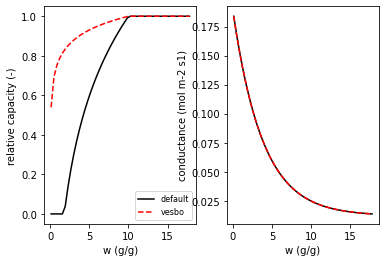

In [25]:
photop = Sphagnum['photosynthesis']
photopM = Sphagnum_Meerkolk['photosynthesis']

cap, _ = photo.relative_capacity(photop, w, w) # relative photosynthetic capacity
g = photo.conductance(photop, w) # mol m-2 s-1

capM, _ = photo.relative_capacity(photopM, w, w) # relative photosynthetic capacity
gM = photo.conductance(photopM, w) # mol m-2 s-1

fig, ax = plt.subplots(1,2)

ax[0].plot(w, cap, 'k-', label='default')
ax[0].plot(w, capM, 'r--', label='vesbo')
ax[0].set_ylabel('relative capacity (-)')
ax[0].set_xlabel('w (g/g)')
ax[0].legend(fontsize=8)

ax[1].plot(w, g, 'k-')
ax[1].plot(w, gM, 'r--')
ax[1].set_ylabel('conductance (mol m-2 s1)')
ax[1].set_xlabel('w (g/g)')

Thus, no changes in conductance response to water content but in Meerkolk-parameterization the decay of photosynthetic capacity is much weaker. Overall, Meerkolk Sphagnum resembles more the forest mosses (?) in terms of its bulk density and photosynthetic capacity.

### How parameters affec cap and g?

For cap: 'CAP_desic': a = [0.58, 10.0], and ...
... from photo.relative_capacity()...     

drying phase is function of w:
    cap_dec = np.maximum(0.0, np.minimum(1.0 + p[0]*np.log(w/p[1]), 1.0)) # [0...cap_dec...1]

and thus p[1] == water content when decay starts and p[0] defines the shape of decay.

### To link hydraulic properties and photosynthesis, one could assume that p[1] <= max_symplast_water.

In Vesbo-parameterization max_symplast_water is crazy (low) and even < min_water_content which is not possible. The parameterization is not physiologically plausible... likely because you adjusted this one to compensate for something else that may be wrong... will take a look on that later on.

### For sensitivity-analysis: vary only second parameter in 'CAP_desic'?

***

### Conductance has four parameters, dependency on water content is as follows:

g = gmax * (a0*np.exp(a1*(w-wopt)) + (1.0 - a0)) # this allows g to go above gmax in dry moss

I would play only with gmax (maximum concuctance) and possibly wopt and leave the rest to their default values; the gmax determines the 'efficiency of CO2 transport from air to chloroplast, and the 'wopt' is a scaling parameter for water-content response (should call it different than 'wopt' in next code version...)

From Williams & Flanangan -papers to which this formulation is based on, the g/gmax response to water content seems very similar for both Sphagnum and Pleurozium so we can assume this is 'generic'.
 

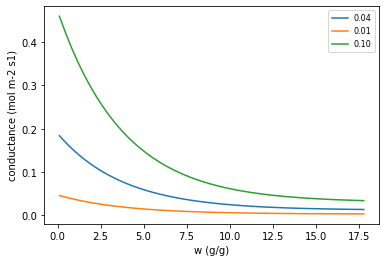

In [26]:
# compare low vs. high gmax curves

gmax = [0.04, 0.01, 0.1]
p = photop.copy()

fig, ax = plt.subplots(1)

for k in gmax:
    p['gmax'] = k
    g = photo.conductance(p, w) # mol m-2 s-1
    ax.plot(w, g, label='%.2f' %k)

ax.set_ylabel('conductance (mol m-2 s1)')
ax.set_xlabel('w (g/g)')
ax.legend(fontsize=8)

Thus wmax scales the conductance; easy interpretatbility

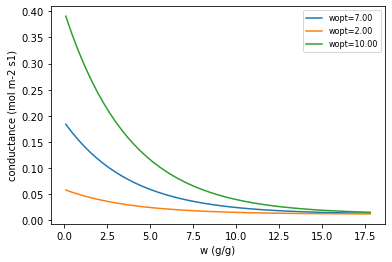

In [27]:
# compare how wopt affects

wopt = [7.0, 2.0, 10.0]
p = photop.copy()

fig, ax = plt.subplots(1)

for k in wopt:
    p['wopt'] = k
    g = photo.conductance(p, w) # mol m-2 s-1
    ax.plot(w, g, label='wopt=%.2f' %k)

ax.set_ylabel('conductance (mol m-2 s1)')
ax.set_xlabel('w (g/g)')
ax.legend(fontsize=8)

So, for fixed gmax, scaling parameter wopt determines shape of conductance moisture response

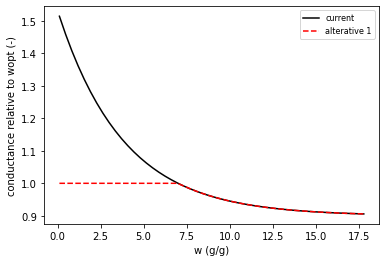

In [28]:
# testing two alternative formulations

#'gmax': 0.04, 'wopt': 7.0, 'a0': 0.7, 'a1': -0.263
gmax = 1.0
a0 = 0.1
a1 = -0.263
wopt = 7.0 # this scaling parameter should approx. same as max_symplast_water. 
            # Assumption is that whenever we have free external water on the moss, CO2 transport (conductance)
            # decays.

# But: what happens in drier moss?  Currently two ideas in pyAPES
g = gmax * (a0*np.exp(a1*(w-wopt)) + (1.0 - a0)) # this allows g to go above gmax in dry moss
gg = gmax * np.minimum(1.0, a0*np.exp(a1*(w-wopt)) + (1.0 - a0))

fig, ax = plt.subplots(1)

ax.plot(w, g, 'k-', label='current')
ax.plot(w, gg, 'r--', label='alterative 1')

ax.set_ylabel('conductance relative to wopt (-)')
ax.set_xlabel('w (g/g)')
ax.legend(fontsize=8)

Which you think is more plausible? Here at w=7.0 we assume all free water has evaporated and the rest is internal (symplast) water. If symplast water content decreases, there will be more air and in theory conductance should increase. But, cell-wall permeability may be affected and pathway shape (torquosity) change?

### Note! Lowering a0 0.7 --> 0.1 changes g[w=0.1] from 4 to 1.5

Ok, lets now create photosynthetic moisture response curve at T=25 and PAR = 1000 umolm-2s-1, Ca=400 ppm

In [29]:
Qp = 1000.0
T = 25.0
Ca = 400.0
wstar=w

# original
res = Moss0.Carbon.co2_exchange(Qp, Ca, T, w, wstar)
# vesbo
resM = MossM.Carbon.co2_exchange(Qp, Ca, T, w, wstar)

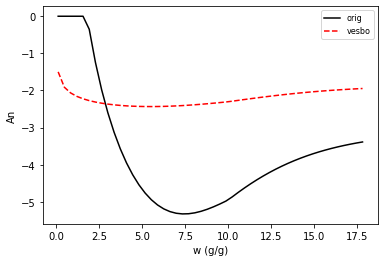

In [30]:
plt.plot(w, res['net_co2'], 'k-', label='orig')
plt.plot(w, resM['net_co2'], 'r--', label='vesbo')
plt.ylabel('An'); plt.xlabel('w (g/g)')
plt.legend(fontsize=8)


The difference in Vcmax and related parameters causes level difference while the moisture response (above) is from 'CAP_desic'.

Before any sensitivity analysis, we should make simple tests and constrain plausible parameter combinations using only BryophyteFarquhar -class (as above) so that our simulated Sphagnum photosynthesis or net co2 exchange is plausible compared to what has been reported in the literature. 

### We can find studies showing how: 1) moisture response should be (for net CO2 exchange and its components), 2) what are the light-saturated photosyntetic rates and dark-respiration rates per unit dry mass, and 3) how the light response should look like.  

This is important!

In [31]:
# light response curve at w = 10.0
Qp = np.linspace(0.0, 1000, 100)
T = 25.0
Ca = 400.0
w = 10.0
wstar=w

# original
res = Moss0.Carbon.co2_exchange(Qp, Ca, T, w, wstar)
# vesbo
resM = MossM.Carbon.co2_exchange(Qp, Ca, T, w, wstar)

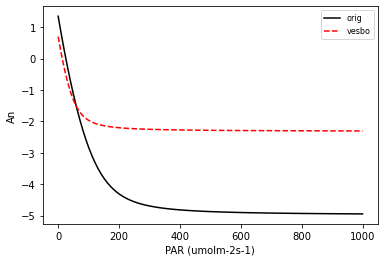

In [32]:
plt.plot(Qp, res['net_co2'], 'k-', label='orig')
plt.plot(Qp, resM['net_co2'], 'r--', label='vesbo')
plt.ylabel('An'); plt.xlabel('PAR (umolm-2s-1)')
plt.legend(fontsize=8)

Lets now play with light-reponse parameters, starting from Moss0 defaults and decrease / increase alpha and Vcmax, Jmax, Rd...

Best to set Jmax & Rd proportional to Vcmax.
Typical range for Jmax/Vcmax is 1.6 -- 2.2 in vascular plants.


1.9 0.030000000000000002
15.0 24.0 0.75
15.0 27.0 0.75
15.0 30.0 0.75
30.0 48.0 1.5
30.0 54.0 1.5
30.0 60.0 1.5
45.0 72.0 2.25
45.0 81.0 2.25
45.0 90.0 2.25


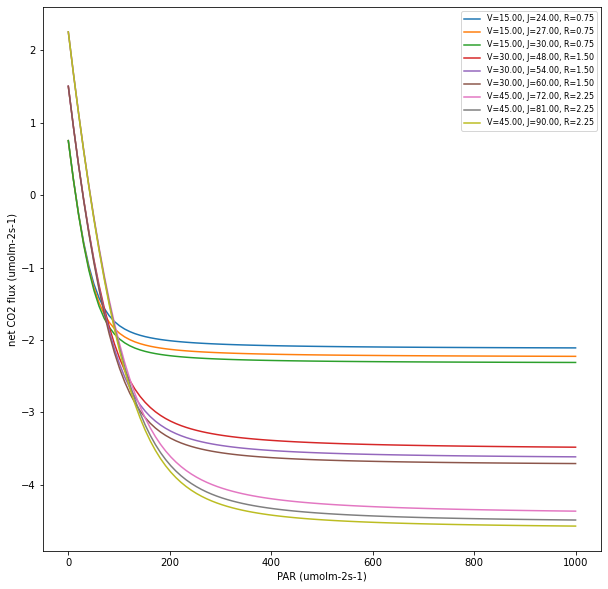

In [33]:
# easiest if we import class BryophyteFarquhar from carbon
from canopy.forestfloor.carbon import BryophyteFarquhar

#--- env. conditions
Qp = np.linspace(0.0, 1000, 100)
T = 25.0
Ca = 400.0
w = 10.0
wstar=w

#---
photop = Moss0.Carbon.photopara.copy()
fj = photop['Jmax'] / photop['Vcmax']
fr = photop['Rd'] / photop['Vcmax']
print(fj, fr)

# vary Vcmax, Jmax...
Vmax = [15., 30., 45.]
fj = [1.6, 1.8, 2.0]
fr = [0.05] # [0.03, 0.05, 0.1]

fig, ax = plt.subplots(1, figsize=(10,10))
for k in Vmax: 
    p = photop.copy()
    p['Vcmax'] = k
    for n in fj:
        p['Jmax'] = n * p['Vcmax']
        for m in fr:
            p['Rd'] = m * p['Vcmax']
            print(p['Vcmax'], p['Jmax'], p['Rd'])
            # create object
            mod = BryophyteFarquhar(p)
            # compute CO2 flux for the parameter combination and 
            res = mod.co2_exchange(Qp, Ca, T, w, wstar)
            ax.plot(Qp, res['net_co2'], '-', label='V=%.2f, J=%.2f, R=%.2f' %(p['Vcmax'], p['Jmax'], p['Rd']))

ax.set_ylabel('net CO2 flux (umolm-2s-1)')
ax.set_xlabel('PAR (umolm-2s-1)')
ax.legend(fontsize=8)



We see how variability in Vcmax dominates the shape of light-response curve over Jmax/Vcmax -ratio and how higher photosynthetic capacity now results into higher dark respiration and changes the light compensation point (i.e. PAR when An == 0)

### Take-home: Fix Jmax/Vcmax -ratio and vary only Vcmax (and Rd/Vcmax -ratio; see next figure)

1.9 0.030000000000000002


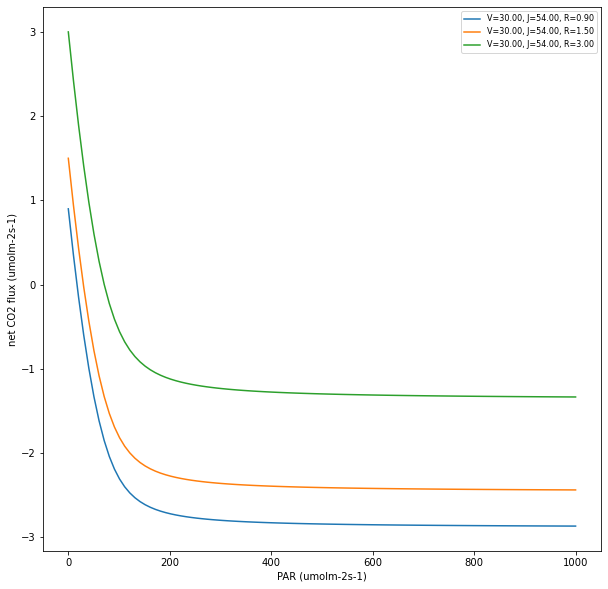

In [41]:
# easiest if we import class BryophyteFarquhar from carbon
from canopy.forestfloor.carbon import BryophyteFarquhar

#--- env. conditions
Qp = np.linspace(0.0, 1000, 100)
T = 25.0
Ca = 400.0
w = 10.0
wstar=w

#---
photop = Moss0.Carbon.photopara.copy()
fj = photop['Jmax'] / photop['Vcmax']
fr = photop['Rd'] / photop['Vcmax']
print(fj, fr)

# fix Jmax/Vcmax ratio = 1.8 and Vcmax; vary Rd/Vcmax
Vmax = [30.] #[15., 30., 45.]
fj = [1.8] # [1.6, 1.8, 2.0]
fr = [0.03, 0.05, 0.1]

fig, ax = plt.subplots(1, figsize=(10,10))
for k in Vmax: 
    p = photop.copy()
    p['Vcmax'] = k
    for n in fj:
        p['Jmax'] = n * p['Vcmax']
        for m in fr:
            p['Rd'] = m * p['Vcmax']
            #print(p['Vcmax'], p['Jmax'], p['Rd'])
            # create object
            mod = BryophyteFarquhar(p)
            # compute CO2 flux for the parameter combination and 
            res = mod.co2_exchange(Qp, Ca, T, w, wstar)
            ax.plot(Qp, res['net_co2'], '-', label='V=%.2f, J=%.2f, R=%.2f' %(p['Vcmax'], p['Jmax'], p['Rd']))

ax.set_ylabel('net CO2 flux (umolm-2s-1)')
ax.set_xlabel('PAR (umolm-2s-1)')
ax.legend(fontsize=8)



Above figure shows the effect of Rd/Vcmax -ratio on net CO2 flux. And how about change in alpha (quantum efficiency)?

1.9 0.030000000000000002


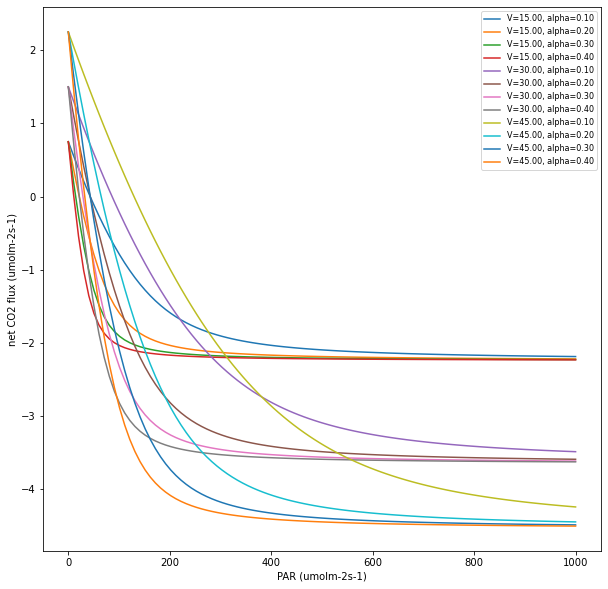

In [35]:
# easiest if we import class BryophyteFarquhar from carbon
from canopy.forestfloor.carbon import BryophyteFarquhar

#--- env. conditions
Qp = np.linspace(0.0, 1000, 100)
T = 25.0
Ca = 400.0
w = 10.0
wstar=w

#---
photop = Moss0.Carbon.photopara.copy()
fj = photop['Jmax'] / photop['Vcmax']
fr = photop['Rd'] / photop['Vcmax']
print(fj, fr)

# vary Vcmax, Jmax...
Vmax = [15., 30., 45.]
alpha = [0.1, 0.2, 0.3, 0.4]
fj = [1.8] #[1.6, 1.8, 2.0]
fr = [0.05] # [0.03, 0.05, 0.1]

fig, ax = plt.subplots(1, figsize=(10,10))
for k in Vmax: 
    p = photop.copy()
    p['Vcmax'] = k
    p['Jmax'] = 1.8 * k
    p['Rd'] = 0.05 * k
        
    for m in alpha:
         p['alpha'] = m
         # create object
         mod = BryophyteFarquhar(p)
         # compute CO2 flux for the parameter combination and 
         res = mod.co2_exchange(Qp, Ca, T, w, wstar)
         ax.plot(Qp, res['net_co2'], '-', label='V=%.2f, alpha=%.2f' %(p['Vcmax'], p['alpha']))

ax.set_ylabel('net CO2 flux (umolm-2s-1)')
ax.set_xlabel('PAR (umolm-2s-1)')
ax.legend(fontsize=8)



We see how very large variation in the shape of light-response curve can be created simply varying Vcmax and alpha, while fixing all other parameters. This would be very intuitive and easy to explain in the paper, and enables us to consider only a few parameters in Morris-analysis.

### For sensitivity analysis I suggest following:

* vary Vcmax
* fix Jmax/Vcmax -ratio (check Williams & Flanagan -paper!)
* vary Rd/Vmax -ratio 
* vary alpha. This parameter could also be made as a decreasing function of moss dry mass; in very dense (large dry mass per area) large fraction of DM can be shaded. In 'community scale' this should mean less steep light-response curve.

This would have also advantage that we can tie the parameter values and ranges to literature findings and your observations of the light-response curve. While there are few papers that report Farquhar parameters, many more show photosynthetic or net co2 flux light response curve (Pmax ~ light-saturated rate) and dark respiration rates; in latter case play with the light-response model to get reasonable values for Vcmax, alpha, Rd/Vcmax.

The same could be done for moisture response (CAP_desic & conductance parameters, see above). In that case, assume light-saturated conditions and simulate moisture response. E.g. Williams & Flanagan show nice graphs.


### How about photosynthetic temperature response?

Let's check how vcmax, jmax and Rd vary with temperature in the current 'default' parameterization. ***NOTE: the following is after correcting mistake in tresp -parameterization!!!*** 

And how this translates to temperature sensitivity of net co2 flux?

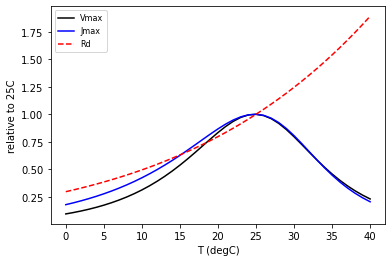

In [51]:
# let's use photo-module's functions
from canopy.forestfloor.bryophoto import photo_temperature_response

# env. conditions
Qp = 1000.0
w = 10.0
Ca = 400.
T = np.arange(0, 41, 1)  # degC


p = Moss0.Carbon.photopara.copy()
#values at 25 degC; unpact parameter dictionary for the function call
Vcmax0 = p['Vcmax']
Jmax0 = p['Jmax']
Rd0 = p['Rd']
Vcmax_T = p['tresp']['Vcmax']
Jmax_T = p['tresp']['Jmax']
Rd_T = p['tresp']['Rd']

# this low-level function gives us temperature response, wants T in Kelvin
Vcmax, Jmax, Rd, Gamma_star = photo_temperature_response(Vcmax0, Jmax0, Rd0, Vcmax_T, Jmax_T, Rd_T, T + 273.15)

fig, ax = plt.subplots(1)

ax.plot(T, Vcmax/Vcmax0, 'k-', label='Vmax')
ax.plot(T, Jmax/Jmax0, 'b-', label='Jmax')
ax.plot(T, Rd/Rd0, 'r--', label='Rd')
ax.set_ylabel('relative to 25C')
ax.set_xlabel('T (degC)')
ax.legend(fontsize=8)

Next check temperature response of net CO2 flux at two light regimes: PAR = 1000 umol m-2 s-1 (light-saturated) & 100 umolm m-2s-1)

Text(0.5, 0, 'T (degC)')

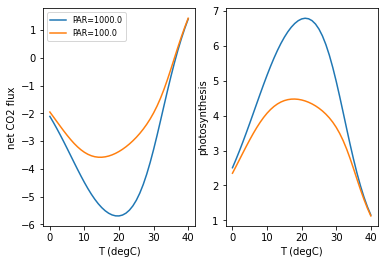

In [52]:
# easiest if we import class BryophyteFarquhar from carbon
#from canopy.forestfloor.carbon import BryophyteFarquhar

Qp = [1000.0, 100.0]
Ca = 400.0
w = 10.0
T = np.arange(0, 41, 1) # this must now be in degC

p = Moss0.Carbon.photopara.copy()
mod = BryophyteFarquhar(p)

fig, ax = plt.subplots(1,2)
for k in Qp:
    res = mod.co2_exchange(k, Ca, T, w, wstar)
    ax[0].plot(T, res['net_co2'], '-', label='PAR=%.1f' %k)
    ax[1].plot(T, res['photosynthesis'], '-', label='PAR=%.1f' %k)
ax[0].set_ylabel('net CO2 flux')
ax[0].set_xlabel('T (degC)')
ax[0].legend(fontsize=8)
ax[1].set_ylabel('photosynthesis')
ax[1].set_xlabel('T (degC)')

So we see how temperature response differs depending on where we are in the light-response curve.

Question is how far we want to go with ***modifications / sensitivity analysis*** of temperature response of photosynthetic parameters? We do not know much on these while the 'generic temperature response' of is rather similar across (vascular)plants.

One thing is temperature acclimation; that could affect temperature optimum of Vcmax and Jmax.

Parameters of temperature response are bit hard to understand intuitiviely but basically:

Activation energy determines the rising phase, de-activation energy the decay at high temperatures and entropy factor is related to temperature optimum. From photo_temperature_response():

Note! This part of code was wrong earlier...

    # ------  Vcmax (umol m-2(leaf)s-1) ------------
    Ha = 1e3 * Vcmax_T[0]  # J mol-1, activation energy Vcmax
    Hd = 1e3 * Vcmax_T[1]  # J mol-1, deactivation energy Vcmax
    Sd = Vcmax_T[2]  # entropy factor J mol-1 K-1

    #NOM = np.exp(Ha * (T - TN) / (R*NT*T)) * (1.0 + np.exp((NT*Sd - Hd) / (NT*R)))
    NOM = np.exp(Ha * (T - T0) / (R*T0*T)) * (1.0 + np.exp((T0*Sd - Hd) / (T0*R)))
    DENOM = (1.0 + np.exp((T*Sd - Hd) / (T*R)))
    Vcmax = Vcmax0 * NOM / DENOM

How Sd and temperature optimum are related?

def topt_deltaS_conversion(xin, Ha, Hd, var_in='deltaS'):
    
    """
    Converts between entropy factor Sv (J mol-1) and temperature optimum
    Topt (K). Medlyn et al. 2002 PCE 25, 1167-1179 eq.19.
    INPUT:
        xin, Ha(J mol-1), Hd(J mol-1)
        input:'deltaS' [Jmol-1] or 'Topt' [K]
    OUT:
        xout - Topt or Sv
    Farquhar parameters temperature sensitivity
    """

In [53]:
# let's see how Sd and optimum temperature are related
from canopy.forestfloor.bryophoto import topt_deltaS_conversion
p = Moss0.Carbon.photopara.copy()

Vcmax_T = p['tresp']['Vcmax']

Ha = 1e3 * Vcmax_T[0]  # J mol-1, activation energy Vcmax
Hd = 1e3 * Vcmax_T[1]  # J mol-1, deactivation energy Vcmax
Sd = Vcmax_T[2]  # entropy factor J mol-1 K-1

#sd = 1e3*np.array([10.0, 100.0, 200.0])
# what is the optimum temperature with these parameters?
Topt = topt_deltaS_conversion(Sd, Ha, Hd, var_in='deltaS')
print('Topt (K): %.1f' %Topt, 'compare fig above!')

Topt (K): 298.0 compare fig above!


### now what if Topt varies as plants acclimate to seasonally varying conditions? How would that be seen in parameter Sd and temperature response?

Let's assume Topt of both Vcmax and Jmax varies from +15degC in winter to +25degC in summer

In [54]:
Topt = np.array([288.15, 298.0]) #K

p = Moss0.Carbon.photopara.copy()
Vcmax_T = p['tresp']['Vcmax']

Ha = 1e3 * Vcmax_T[0]  # J mol-1, activation energy Vcmax
Hd = 1e3 * Vcmax_T[1]  # J mol-1, deactivation energy Vcmax

Sd_v =  topt_deltaS_conversion(Topt, Ha, Hd, var_in='Topt')

Jmax_T = p['tresp']['Jmax']

Ha = 1e3 * Jmax_T[0]  # J mol-1, activation energy Jmax
Hd = 1e3 * Jmax_T[1]  # J mol-1, deactivation energy Jmax

Sd_j =  topt_deltaS_conversion(Topt, Ha, Hd, var_in='Topt')
print(Sd_v, Sd_j)

[690.36379813 667.42179481] [686.23028581 663.2882825 ]


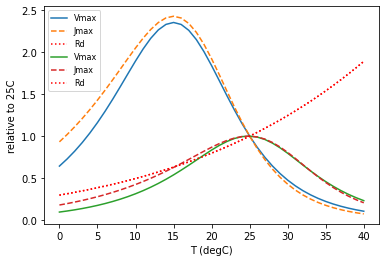

In [58]:


# let's see how parameters temperature response has changed.
p = Moss0.Carbon.photopara.copy()

Vcmax0 = p['Vcmax']
Jmax0 = p['Jmax']
Rd0 = p['Rd']

Vcmax_T = p['tresp']['Vcmax']
Jmax_T = p['tresp']['Jmax']
Rd_T = p['tresp']['Rd']

# this low-level function gives us temperature response
T = np.arange(0, 41, 1) 

fig, ax = plt.subplots(1)
for k in range(2):
    Vcmax_T[-1] = Sd_v[k] # modifies parameter Sd
    Jmax_T[-1] = Sd_j[k] # modifies parameter Sd
    
    # this low-level function gives us temperature response
    Vcmax, Jmax, Rd, Gamma_star = photo_temperature_response(Vcmax0, Jmax0, Rd0, Vcmax_T, Jmax_T, Rd_T, T + 273.15)
    #Vcmax, Jmax, Rd, Gamma_star = photo_temperature_response(1.0, 1.0, 1.0, Vcmax_T, Jmax_T, Rd_T, T + 273.15)

    #print(Vcmax, Vcmax0)
    ax.plot(T, Vcmax/Vcmax0, '-', label='Vmax')
    ax.plot(T, Jmax/Jmax0, '--', label='Jmax')
    ax.plot(T, Rd/Rd0, 'r:', label='Rd')

    ax.set_ylabel('relative to 25C')
ax.set_xlabel('T (degC)')
ax.legend(fontsize=8)

We see how lower temperature optimum (entropy factor Sd) drastically changes the temperature response curve. But at the same time, if we don't adjust Vcmax25, then we would get arbitrarily large Vcmax and Jmax at low temperatures. This will lead to problem shown in next figure; thus if we want to say we modify photosynthetic temperature optimum (would be intuitive!), then we need to revise photo_temperature_response(); see eq. 18 in Medlyn et al. 2002 Plant, Cell, Environ.!

Will do that later this week!

{'Vcmax': 45.0, 'Jmax': 85.5, 'Rd': 1.35, 'alpha': 0.3, 'theta': 0.8, 'beta': 0.9, 'gmax': 0.04, 'wopt': 7.0, 'a0': 0.7, 'a1': -0.263, 'CAP_desic': [0.58, 10.0], 'tresp': {'Vcmax': [78.0, 200.0, 667.4217948141834], 'Jmax': [56.0, 200.0, 663.2882824963056], 'Rd': [33.0]}}


Text(0.5, 0, 'T (degC)')

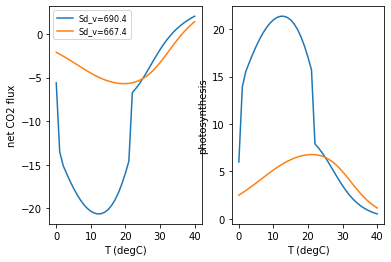

In [62]:
# easiest if we import class BryophyteFarquhar from carbon
#from canopy.forestfloor.carbon import BryophyteFarquhar

Qp = 1000.0
Ca = 400.0
w = 10.0

p = Moss0.Carbon.photopara.copy()
print(p)

mod = BryophyteFarquhar(p)

fig, ax = plt.subplots(1,2)
for k in range(2):
    p = Moss0.Carbon.photopara.copy()
    p['tresp']['Vcmax'][-1] = Sd_v[k] # modifies parameter Sd
    p['tresp']['Jmax'][-1] = Sd_j[k] # modifies parameter Sd
    #print(p)
    mod = BryophyteFarquhar(p)
    res = mod.co2_exchange(Qp, Ca, T, w, wstar)
    ax[0].plot(T, res['net_co2'], '-', label='Sd_v=%.1f' %Sd_v[k])
    ax[1].plot(T, res['photosynthesis'], '-')
ax[0].set_ylabel('net CO2 flux')
ax[0].set_xlabel('T (degC)')
ax[0].legend(fontsize=8)
ax[1].set_ylabel('photosynthesis')
ax[1].set_xlabel('T (degC)')

Here the problem with current formulation of temperature response!